## Step 1: Load and Visualize Data

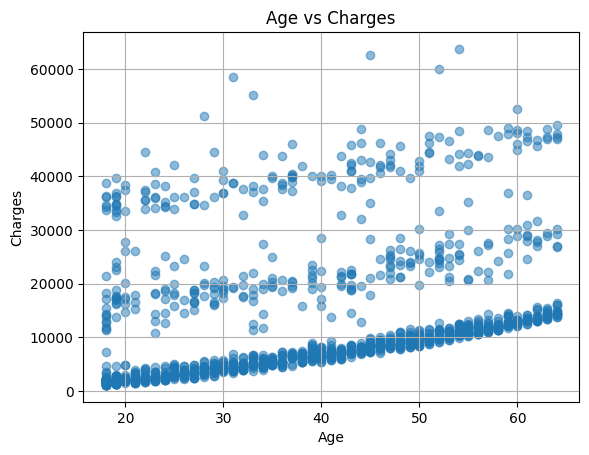

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/insurance.csv")
X = df['age'].values
y = df['charges'].values

plt.scatter(X, y, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.grid(True)
plt.show()

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
print(len(X))

1338


## Step 2: Define Cost Function (MSE)

In [4]:
import numpy as np

def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def predict(X, w, b):
    return w * X + b

w, b = 0, 0
y_pred = predict(X, w, b)
mse = compute_mse(y, y_pred)
print(f"MSE with w=0 and b=0: {mse}")

MSE with w=0 and b=0: 322646873.5887047


## Step 3: Gradient Descent Function

### 🧮 Mean Squared Error (MSE)

The objective of linear regression is to minimize the **Mean Squared Error (MSE)** between the true values and the predicted values:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - (w x_i + b))^2
$$

---

### 🎯 Goal

Minimize the MSE by computing the partial derivatives of the loss function with respect to **w** and **b**.

---

### ✏️ Gradient Derivation

**1. Gradient with respect to** $w$:

$$
\frac{\partial \text{MSE}}{\partial w} = -\frac{2}{n} \sum (x_i \cdot (y_i - \hat{y}_i)) = -\frac{2}{n} X^T(y - \hat{y})
$$

**2. Gradient with respect to** $b$:

$$
\frac{\partial \text{MSE}}{\partial b} = -\frac{2}{n} \sum (y_i - \hat{y}_i)
$$

---

### 🌀 Intuition

- These gradients point in the direction of **steepest increase** in loss.  
- To minimize the loss, we **subtract** them during parameter update (i.e., gradient descent).
- Hence:

```python
w -= lr * dw
b -= lr * db


In [5]:
def gradient_descent(X, y, lr=0.00001, epochs=10000, tolerance=1e-1): 
    n = len(X)
    w, b = 0.0, 0.0
    loss_history = []

    prev_mse = None  # sekarang None dulu

    for epoch in range(epochs):
        y_pred = w * X + b
        error = y - y_pred
        mse = np.mean(error ** 2)
        loss_history.append(mse)

        dw = -(2/n) * np.dot(X, error)
        db = -(2/n) * np.sum(error)

        w -= lr * dw
        b -= lr * db

        if epoch % 1000 == 0:
            print(f"Epoch {epoch}: MSE = {mse:.2f}, w = {w:.4f}, b = {b:.4f}")

    return w, b, loss_history


# Panggil fungsi
w_final, b_final, losses = gradient_descent(X.flatten(), y)
print(f"Final slope: {w_final}, Final intercept: {b_final}")


Epoch 0: MSE = 322646873.59, w = 11.4226, b = 0.2654
Epoch 1000: MSE = 134570350.48, w = 328.9615, b = 14.6197
Epoch 2000: MSE = 134565227.13, w = 328.7997, b = 21.7756
Epoch 3000: MSE = 134560127.03, w = 328.6383, b = 28.9153
Epoch 4000: MSE = 134555050.06, w = 328.4773, b = 36.0387
Epoch 5000: MSE = 134549996.13, w = 328.3166, b = 43.1460
Epoch 6000: MSE = 134544965.12, w = 328.1563, b = 50.2371
Epoch 7000: MSE = 134539956.93, w = 327.9963, b = 57.3122
Epoch 8000: MSE = 134534971.46, w = 327.8368, b = 64.3711
Epoch 9000: MSE = 134530008.61, w = 327.6775, b = 71.4141
Final slope: 327.51885060341357, Final intercept: 78.43399043189513


In [6]:
print(f"The final slope: {w_final}")
print(f"The final intercept: {b_final}")    

The final slope: 327.51885060341357
The final intercept: 78.43399043189513


## Step 4: Plot Regression Line

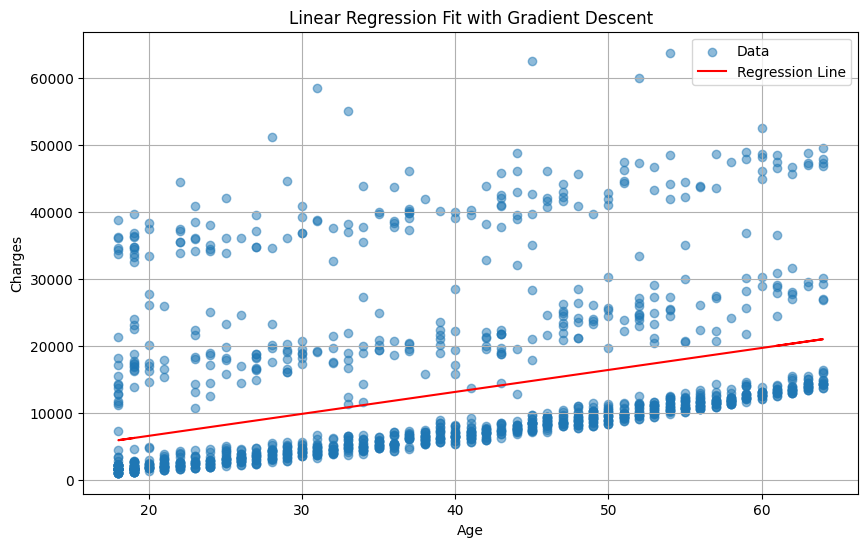

In [7]:
y_pred_final = w_final * X + b_final

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data', alpha=0.5)
plt.plot(X, y_pred_final, color='red', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Linear Regression Fit with Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

## Step 5: Visualize Gradient Descent Curve (MSE vs Weight)

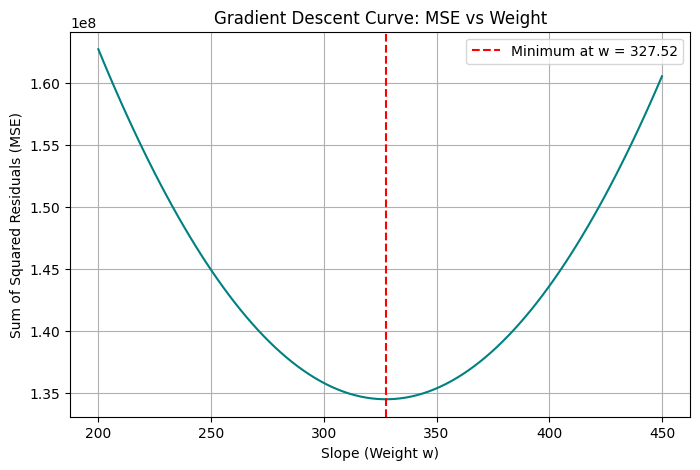

In [8]:
# Simulate loss curve (MSE vs slope w) while fixing bias
import numpy as np
import matplotlib.pyplot as plt

def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

w_range = np.linspace(200, 450, 100)
b_fixed = b_final  # keep the bias constant
loss_curve = [compute_mse(y, w * X + b_fixed) for w in w_range]

# Plot the curve
plt.figure(figsize=(8, 5))
plt.plot(w_range, loss_curve, color='teal')
plt.xlabel('Slope (Weight w)')
plt.ylabel('Sum of Squared Residuals (MSE)')
plt.title('Gradient Descent Curve: MSE vs Weight')
plt.axvline(w_final, color='red', linestyle='--', label=f'Minimum at w = {w_final:.2f}')
plt.legend()
plt.grid(True)
plt.show()